
# Day 10: Model Evaluation & Metrics ⚡

In this notebook, we’ll explore:

- Different evaluation metrics for classification (accuracy, precision, recall, F1-score, ROC-AUC)
- Confusion matrix and visualization
- Regression metrics (MAE, MSE, RMSE, R²)
- Cross-validation for reliable performance estimates
- Bias-variance tradeoff, learning curves, and validation curves




In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay, classification_report,
                             mean_absolute_error, mean_squared_error, r2_score, roc_curve)



## 1. Classification Metrics Example (Breast Cancer Dataset)


Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1-score: 0.9790209790209791
ROC-AUC: 0.99737962659679


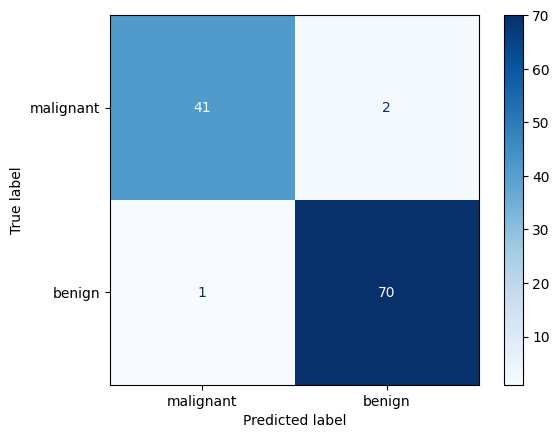


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



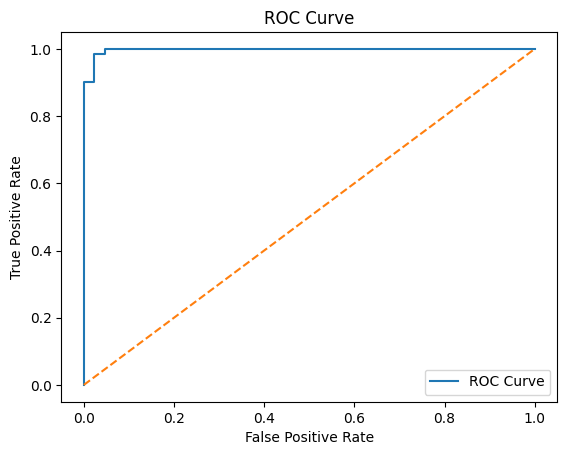

In [2]:

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline with scaling + logistic regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=500))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:,1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



## 2. Regression Metrics Example (California Housing Dataset)


In [3]:

# Load dataset
housing = fetch_california_housing()
X_reg, y_reg = housing.data, housing.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


MAE: 0.533200130495698
MSE: 0.5558915986952422
RMSE: 0.7455813830127749
R²: 0.5757877060324524



## 3. Cross-Validation & Learning Curves


Cross-validation accuracy scores: [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Mean CV Accuracy: 0.9806862288464524


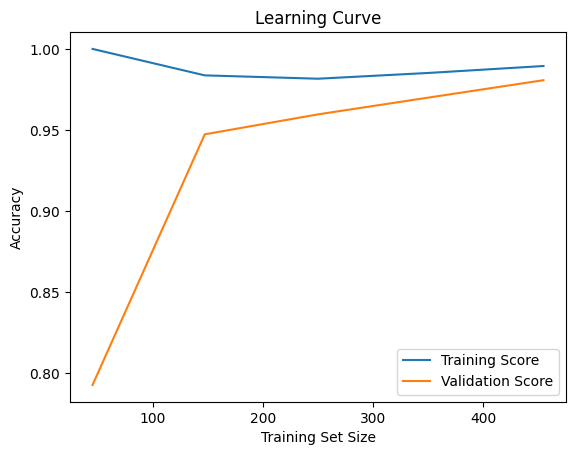

In [4]:

# Cross-validation on classification pipeline
scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean CV Accuracy:", scores.mean())

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(pipe, X, y, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()



## ✨ Conclusion

- Different tasks need different metrics — accuracy isn’t enough.  
- For **classification**, we explored precision, recall, F1, ROC-AUC, and confusion matrices.  
- For **regression**, we used MAE, MSE, RMSE, and R².  
- Cross-validation and learning curves help diagnose overfitting and underfitting.  

 A good model balances the right metrics for the problem at hand!
